<a href="https://colab.research.google.com/github/Mentor-Sahr/AOTS_ML_SP/blob/master/ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class ="alert alert-block alert-success" style='text-align:center'>
<h2> Ensemble learning </h2>
</div>

This is a technique that combines individual models together in order to improve stability and predictive power of a model,
ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

<div class ="alert alert-block alert-warning" style='text-align:center'>
<h2> How does it work? </h2>
</div>

### The Concept behind

It combines multiple machine learning models into one predictive model.

Certain models do well when working on one aspect of data while others do well on other aspects of data, so instead of using one model we use multiple models together and predict a final decision.

The **goal** is to make sure that the accuracy is higher than the one of a single model

<img src="ensemble.jpg" style="height:300px">

<div class ="alert alert-block alert-warning" style='text-align:center'>
<h2> Types of Ensemble learning </h2>
</div>

There are many types of ensemble learning but we are going to focus on three types for now but feel free to checkout all of the other ones.

three types of ensemble learning:
1. **Blending**: Blending is a type of ensemble learning where we independently train a number of models, weighting the estimation results and then adding them together. and the simplest way to do this is to the take the average.

2. **Bagging**: Bagging is a type of ensemble learning where we create a number of subsets(also called bootstrap samples) by extracting randomly for the training data after allowing duplication, and we train the models with these subsets and we do estimations on them.

3. **Stacking**: Stacking is a type of ensemble learning where we make predictions by using a meta-model trained from a pool of base models — a pool of base models are first trained using training data and asked to give their prediction; a different meta model is then trained to use outputs from base models to give the final prediction.

<div class ="alert alert-block alert-success" style='text-align:center'>
<h2> Ensemble learning example </h2>
</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=.5)
    
    plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8, edgecolors='k')

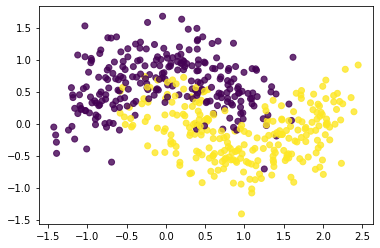

In [4]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 1. Voting Classifier

A voting classifier is a type of ensemble learning method in machine learning that combines multiple different models, or "classifiers", to make a prediction. 

The idea behind a voting classifier is that by combining multiple models, the overall prediction will be more accurate than any one model alone.

There are several ways to implement a voting classifier, but one common approach is to use a majority vote. 

Each classifier in the ensemble makes a prediction, and the class with the most votes is selected as the final prediction. 

This approach works particularly well when the individual classifiers have different strengths and weaknesses.

Another approach to voting classifiers is to use weighted voting. In this approach, each classifier is given a weight, and the final prediction is determined by a weighted average of the predictions from each classifier. 

This approach can be particularly useful when certain classifiers are more accurate or reliable than others.

Voting classifiers can be used in a variety of machine learning tasks, such as classification and regression. 

They are particularly useful in situations where there is a lot of uncertainty in the data or where there are multiple possible outcomes.

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [6]:
model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)

model_4 = VotingClassifier([('SGD', model_1),
                            ('Tree', model_2),
                            ('KNN', model_3)],
                          voting='hard')

for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

SGDClassifier 0.84
DecisionTreeClassifier 0.86
KNeighborsClassifier 0.86
VotingClassifier 0.8733333333333333


### 2. Blending

In blending, multiple models are also trained on the same data, but instead of combining their predictions directly, a new model is trained to make the final prediction. The predictions of the original models are used as input features for the new model, and the new model learns to combine them in a way that produces the best prediction

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define the individual classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = RandomForestClassifier(n_estimators=100, random_state=0)

# Define the blending classifier
eclf = VotingClassifier(estimators=[('lr', clf1), ('knn', clf2), ('rf', clf3)], voting='soft')

# Fit the individual classifiers on the training data
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

# Use the individual classifiers to make predictions on the test data
pred1 = clf1.predict_proba(X_test)
pred2 = clf2.predict_proba(X_test)
pred3 = clf3.predict_proba(X_test)

# Use the predicted probabilities as features for the blending classifier
X_blend = np.concatenate([pred1, pred2, pred3], axis=1)

# Fit the blending classifier on the predicted probabilities
eclf.fit(X_blend, y_test)

# Use the blending classifier to make predictions on the test data
blend_pred = eclf.predict(X_blend)

# Evaluate the performance of the individual classifiers and the blending classifier
print('Logistic regression accuracy: {:.2f}'.format(clf1.score(X_test, y_test)))
print('KNN accuracy: {:.2f}'.format(clf2.score(X_test, y_test)))
print('Random forest accuracy: {:.2f}'.format(clf3.score(X_test, y_test)))
print('Blending classifier accuracy: {:.2f}'.format(eclf.score(X_blend, y_test)))

Logistic regression accuracy: 0.81
KNN accuracy: 0.88
Random forest accuracy: 0.89
Blending classifier accuracy: 0.96


### 3. Bagging

In bagging, we first divide the training data into multiple subsets, each of which is then used to train a different model. 

The subsets are created by randomly sampling the data with replacement, which means that some data points may appear multiple times in a given subset, while others may not appear at all. Each model is trained independently of the others, using a different subset of the data.

Once all the models have been trained, we can make a prediction by combining their outputs in some way. 

The most common approach is to take the average of the predictions made by each model. 

However, other methods such as weighted averaging, where each model's prediction is given a different weight, can also be used.

In [8]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [18]:
model = BaggingClassifier(estimator=KNeighborsClassifier(),
                         n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.88

In [13]:
# Create a decision tree classifier
base_estimator = DecisionTreeClassifier()

# Create a bagging classifier with 50 estimators
bagging = BaggingClassifier(estimator=base_estimator, n_estimators=50)

# Fit the bagging classifier on the training data
bagging.fit(X_train, y_train)

# Evaluate the bagging classifier on the test data
score = bagging.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.8866666666666667


In [14]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
DT.score(X_test, y_test)

0.8733333333333333

In [12]:
model_rf = RandomForestClassifier(n_estimators=100)

model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.8733333333333333

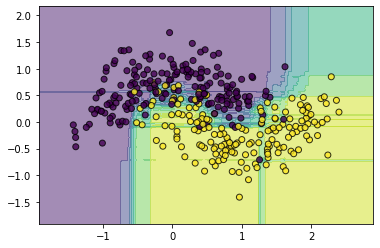

In [ ]:
plot_decision_boundary(model, X_train, y_train)

### 4. Boosting 

Boosting is another popular ensemble learning technique used for improving the accuracy of machine learning models. In contrast to bagging, which uses multiple independently trained models, boosting trains models sequentially, with each model attempting to correct the errors of the previous model. The idea is to focus on the data points that are difficult to classify, and gradually improve the accuracy of the model.

Boosting works by iteratively training a sequence of weak learners, typically decision trees, on modified versions of the original data. Each weak learner is trained on a subset of the data, and assigns weights to each data point based on how well it was able to classify that point. The weights are then used to adjust the importance of each data point in the next round of training.

The final prediction is made by combining the predictions of all the weak learners. In many boosting algorithms, the predictions are combined by taking a weighted average of the individual predictions, with the weights determined by the performance of each weak learner.

In [15]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [17]:
# Create a decision tree classifier as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier with 50 estimators
adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1)

# Fit the AdaBoost classifier on the training data
adaboost.fit(X_train, y_train)

# Evaluate the AdaBoost classifier on the test data
score = adaboost.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.8866666666666667


In [ ]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.88

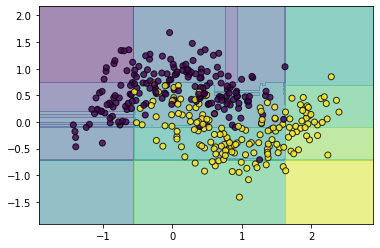

In [ ]:
plot_decision_boundary(model, X_train, y_train)

### 5. Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
model = StackingClassifier([('SGD', model_1),
                            ('Tree', model_2),
                            ('KNN', model_3)],
                             final_estimator=KNeighborsClassifier())

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8666666666666667

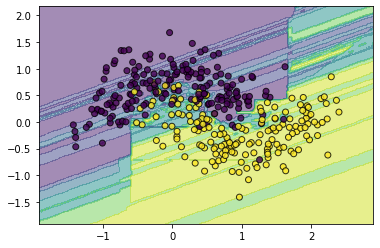

In [ ]:
plot_decision_boundary(model, X_train, y_train)

<div class ="alert alert-block alert-success" style='text-align:center'>
<h2> Coding of Ensemble learning </h2>
</div>

#### Dataset

Lets start by getting the dataset and import other dependencies that we are going to use

In [ ]:
# import dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
X = df[["GrLivArea", "YearBuilt"]]
X.head()

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


In [ ]:
y = df["SalePrice"]
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### Blending

In Blending various models are created by changing the following conditions:
- Techniques (eg linear regression, SVM, decision tree, neural network, etc.)
- Hyperparameters (eg SVM kernel type, initial weights, etc.)
- How to preprocess input data (eg standardization, logarithmic transformation, PCA, etc.)

Like we said in blending we will be using different models and weight their results and calculate the average of them so that's what we are going to be doing

we are going to start by running the models individually and calculate the MSE score and after we will put them together and add weight to them, showing the importance they have and after calculate the MSE score on the combined results and see if we can get a better score than the ones we get on the individual models

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)
X_train.head()

,GrLivArea,YearBuilt
64,2034,1997
682,1291,1996
960,858,1958
1384,1258,1939
1100,438,1920


In [ ]:
LM= linear_model.LinearRegression(normalize=True)
LM.fit(X_train, y_train)
LM_pred = LM.predict(X_test)
print("MSE(Linear Model): ",mean_squared_error(y_test, LM_pred))

sc = StandardScaler()
X_test_std = sc.fit_transform(X_test)
X_train_std = sc.fit_transform(X_train)
SV= SVR(kernel='rbf')
SV.fit(X_train_std, y_train)
SV_pred = SV.predict(X_test_std)
print("MSE(SVR): ",mean_squared_error(y_test, SV_pred))

DR = DecisionTreeRegressor(max_depth=3)
DR.fit(X_train, y_train)
DR_pred = DR.predict(X_test)
print("MSE(Decision Tree Regressor): ",mean_squared_error(y_test, DR_pred))

mix_pred = np.vstack((LM_pred, SV_pred, DR_pred))
mix_pred.shape

mean_pred = LM_pred*0.5+SV_pred*0.1+DR_pred*0.4
print("MSE(mean): ",mean_squared_error(y_test, mean_pred))

MSE(Linear Model):  2690647926.377603
MSE(SVR):  7119069689.683064
MSE(Decision Tree Regressor):  2553443455.30812
MSE(mean):  2470929971.5410113


In [ ]:
Las= Lasso(alpha=0.1)
Las.fit(X_train, y_train)
Las_pred = Las.predict(X_test)
print("MSE(Lasso): ",mean_squared_error(y_test, Las_pred))

sc = StandardScaler()
X_test_std = sc.fit_transform(X_test)
X_train_std = sc.fit_transform(X_train)
SV= SVR(kernel='rbf',C=0.5)
SV.fit(X_train_std, y_train)
SV_pred = SV.predict(X_test_std)
print("MSE(SVR): ",mean_squared_error(y_test, SV_pred))

DR = DecisionTreeRegressor(max_depth=3)
DR.fit(X_train, y_train)
DR_pred = DR.predict(X_test)
print("MSE(Decision Tree Regressor): ",mean_squared_error(y_test, DR_pred))

mix_pred = np.vstack((LM_pred, SV_pred, DR_pred))
mix_pred.shape

mean_pred = Las_pred*0.5+SV_pred*0.05+DR_pred*0.45
print("MSE(mean): ",mean_squared_error(y_test, mean_pred))

MSE(Lasso):  2690647942.4335794
MSE(SVR):  7128920068.0851145
MSE(Decision Tree Regressor):  2553443455.30812
MSE(mean):  2413207951.9277987


In [ ]:
Rid= Ridge(alpha=0.1)
Rid.fit(X_train, y_train)
Rid_pred = Rid.predict(X_test)
print("MSE(Ridge): ",mean_squared_error(y_test, Rid_pred))

sc = StandardScaler()
X_test_std = sc.fit_transform(X_test)
X_train_std = sc.fit_transform(X_train)
SV= SVR(kernel='linear', C=100)
SV.fit(X_train_std, y_train)
SV_pred = SV.predict(X_test_std)
print("MSE(SVR): ",mean_squared_error(y_test, SV_pred))

DR = DecisionTreeRegressor(max_depth=9)
DR.fit(X_train, y_train)
DR_pred = DR.predict(X_test)
print("MSE(Decision Tree Regressor): ",mean_squared_error(y_test, DR_pred))

mix_pred = np.vstack((LM_pred, SV_pred, DR_pred))
mix_pred.shape

mean_pred = Rid_pred*0.2+SV_pred*0.1+DR_pred*0.7
print("MSE(mean): ",mean_squared_error(y_test, mean_pred))

MSE(Ridge):  2690647942.087789
MSE(SVR):  3389628361.3601527
MSE(Decision Tree Regressor):  1954451644.6903894
MSE(mean):  1896758398.8466942


### Bagging

In order to get the bootstrap samples, we need to split our data using train test split with shuffle enabled

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)
X_train.head()

**Bagging** is also going to be a class, that is going to train and predrict models using the bootstrap samples

```
class Bagging():
```

### Fit
the fit function will take in the models and data(X, y) that is going to use to train the models
```
def fit(self, models, X, y):
```

we will create a list that is going to store the models after we train them
```
self.model_list = []
```

to go through the models we will loop through them
```
for j, model in enumerate(models):
```

we will select random values from our data, that we are going to use to train the models

we will start by setting the seed value in order to recreate the same random values at each iteration
```
np.random.seed(j)
```

we will get random indeces that we will use to select the random values in the data we have
```
self.rand_index = np.random.choice(X.index,X.shape[0], replace=True)
self.X_rand = X.loc[self.rand_index]
self.y_rand = y.loc[self.rand_index]
```

after we will fit the data and store the fitted models in the list created earlier and these models will be use to predict after
```
self.model_list.append(model.fit(self.X_rand, self.y_rand))
```

let's put the codes together
```
class Bagging():
     
    def fit(self, models, X, y):
        self.model_list = []
        for j, model in enumerate(models):
            np.random.seed(j)
            self.rand_index = np.random.choice(X.index,X.shape[0], replace=True)
            self.X_rand = X.loc[self.rand_index]
            self.y_rand = y.loc[self.rand_index]
            self.model_list.append(model.fit(self.X_rand, self.y_rand))
            
```

### Predict
the predict function will use the model list created in the fit function and it will take in the X and y(for mean squared error)

we will start by creating an ndarray that will be used to broadcast the predicted values in it
```
self.pred_data = np.zeros((X.shape[0],len(self.model_list)))
```

we will loop through the model list that we have and we will use each one of them to predict
```
for i, model in enumerate(self.model_list):
```

we will use each model to predict
```
self.pred = model.predict(X)
```

after prediction we will save the values in the ndarray created earlier 
```
self.pred_data[:,i] = self.pred
```

finally we will create the final prediction by calculating the mean of our predicted values
```
self.final_pred = np.mean(self.pred_data, axis=1)
```

after we can return the predicted values
```
return self.final_pred
```

during the predicting phase we can also print some of the values like the **MSE** and also the model list, so that we can have a clear understanding of what's happening 
```
print(X.shape[0])
print(len(self.model_list))
print("MSE(mean): ",mean_squared_error(y, self.final_pred))
```

let's put together the codes

In [ ]:
class Bagging():
     
    def fit(self, models, X, y):
        self.model_list = []
        for j, model in enumerate(models):
            np.random.seed(j)
            self.rand_index = np.random.choice(X.index,X.shape[0], replace=True)
            self.X_rand = X.loc[self.rand_index]
            self.y_rand = y.loc[self.rand_index]
            self.model_list.append(model.fit(self.X_rand, self.y_rand))
            
    def predict(self, X, y):
        print(X.shape[0])
        print(len(self.model_list))
        self.pred_data = np.zeros((X.shape[0],len(self.model_list)))
        for i, model in enumerate(self.model_list):
            self.pred = model.predict(X)
            self.pred_data[:,i] = self.pred
        self.final_pred = np.mean(self.pred_data, axis=1)
        print("MSE(mean): ",mean_squared_error(y, self.final_pred))
        return self.final_pred

Lets compare the models alone vs using bagging and check which one is better

In [ ]:
np.random.seed(1)
rand_index = np.random.choice(X_train.index,1022, replace=True)
np.random.seed(1)
rand_index = np.random.choice(X_train.index,X_train.shape[0], replace=True)
X_train1 = X_train.loc[rand_index]
y_train1 = y_train.loc[rand_index]

np.random.seed(2)
rand_index = np.random.choice(X_train.index,X_train.shape[0], replace=True)
X_train2 = X_train.loc[rand_index]
y_train2 = y_train.loc[rand_index]

np.random.seed(3)
rand_index = np.random.choice(X_train.index,X_train.shape[0], replace=True).tolist()
X_train3 = X_train.loc[rand_index]
y_train3 = y_train.loc[rand_index]

In [ ]:
reg1 = GradientBoostingRegressor(n_estimators=100,max_depth=5).fit(X_train1, y_train1)
y_pred1 =reg1.predict(X_test)
print("MSE: ",mean_squared_error(y_test, y_pred1))
reg2 = GradientBoostingRegressor(n_estimators=500,max_depth=3).fit(X_train2, y_train2)
y_pred2 =reg2.predict(X_test)
print("MSE: ",mean_squared_error(y_test, y_pred2))
reg3 = GradientBoostingRegressor(n_estimators=250,max_depth=5).fit(X_train3, y_train3)
y_pred3 =reg3.predict(X_test)
print("MSE: ",mean_squared_error(y_test, y_pred3))
y_pred_mean = (y_pred1 + y_pred2 + y_pred3)/3
print("MSE(mean): ",mean_squared_error(y_test, y_pred_mean))

In [ ]:
reg1 = xgb.XGBRegressor(n_estimators=100,max_depth=5).fit(X_train1, y_train1)
y_pred1 =reg1.predict(X_test)
print("MSE: ",mean_squared_error(y_test, y_pred1))
reg2 = xgb.XGBRegressor(n_estimators=500,max_depth=3).fit(X_train2, y_train2)
y_pred2 =reg2.predict(X_test)
print("MSE: ",mean_squared_error(y_test, y_pred2))
reg3 = xgb.XGBRegressor(n_estimators=250,max_depth=5).fit(X_train3, y_train3)
y_pred3 =reg3.predict(X_test)
print("MSE: ",mean_squared_error(y_test, y_pred3))
y_pred_mean = (y_pred1 + y_pred2 + y_pred3)/3
print("MSE(mean): ",mean_squared_error(y_test, y_pred_mean))

In [ ]:
reg1 = lgb.LGBMRegressor(n_estimators=100,max_depth=5).fit(X_train1, y_train1)
y_pred1 =reg1.predict(X_test)
print("MSE: ",mean_squared_error(y_test, y_pred1))
reg2 = lgb.LGBMRegressor(n_estimators=500,max_depth=3).fit(X_train2, y_train2)
y_pred2 =reg2.predict(X_test)
print("MSE: ",mean_squared_error(y_test, y_pred2))
reg3 = lgb.LGBMRegressor(n_estimators=250,max_depth=5).fit(X_train3, y_train3)
y_pred3 =reg3.predict(X_test)
print("MSE: ",mean_squared_error(y_test, y_pred3))
y_pred_mean = (y_pred1 + y_pred2 + y_pred3)/3
print("MSE(mean): ",mean_squared_error(y_test, y_pred_mean))
y_pred3[1]

##### using bagging

In [ ]:
models = [xgb.XGBRegressor(n_estimators=100,max_depth=5), GradientBoostingRegressor(n_estimators=100,max_depth=5), lgb.LGBMRegressor(n_estimators=100,max_depth=5)]
bg = Bagging()
bg.fit(models=models, X = X_train, y = y_train)
bg.predict(X_test, y_test)[:10]

In [ ]:
models = [lgb.LGBMRegressor(n_estimators=100,max_depth=5), lgb.LGBMRegressor(n_estimators=100,max_depth=5), lgb.LGBMRegressor(n_estimators=100,max_depth=5)]
bg = Bagging()
bg.fit(models=models, X = X_train, y = y_train)
bg.predict(X_test, y_test)[:10]

In [ ]:
models = [xgb.XGBRegressor(n_estimators=100,max_depth=5), xgb.XGBRegressor(n_estimators=100,max_depth=5), xgb.XGBRegressor(n_estimators=100,max_depth=5)]
bg = Bagging()
bg.fit(models=models, X = X_train, y = y_train)
bg.predict(X_test, y_test)[:10]

In [ ]:
models = [xgb.XGBRegressor(n_estimators=100,max_depth=5), lgb.LGBMRegressor(n_estimators=100,max_depth=5), GradientBoostingRegressor(n_estimators=100,max_depth=5)]
bg = Bagging()
bg.fit(models=models, X = X_train, y = y_train)
bg.predict(X_test, y_test)[:10]

### Stacking

Like the other ensemble methods created above, stacking is also to be a class
```
class Stacking():
```

Our stacking class will take in the models to use as the base models and the end model that we will use to train with the output of the base models

```
def __init__(self,models,end_model):
    self.models = models
    self.end_model = end_model
```

### Fit

the fit function like always will take in the training data, but this time we are going to be processing our data, so we will also give it a seed value to be used and a k for k_fold

```
def fit(self,X,y,K,seed):
```

we are going to start by initializing what we are going to be using
```
self.K = K
KF = KFold(n_splits=K, random_state=seed, shuffle=True)
self.pred_data = np.array([])
X = np.array(X)
y = np.array(y)
self.preds = np.array([])
self.model_list = []
```

the number of splits to be used in k_fold and where we are going to be storing our results

after we are going to be training our models, predict and store the values 
```
for i, model in enumerate(self.models):
    for train_index, test_index in KF.split(X):
        self.model_list.append(model.fit(X[train_index],y[train_index]))
        y_pred = model.predict(X[test_index])
        self.preds = np.append(self.preds, y_pred)
```

after we will reshape the values and use them to train our end model
```
self.preds = self.preds.reshape(len(self.models),X.shape[0]).T
self.end_model.fit(self.preds, y)
```

### Predict

in our predict function we are going to be getting values and use them to predict using our end model to get the final predictions
```
X = np.array(X)
y = np.array(y)
self.test_array = np.array([])
self.final_test = np.zeros((X.shape[0],self.K))
for model in self.model_list:
    y_pred_test = model.predict(X)
    self.test_array = np.append(self.test_array, y_pred_test)
self.test_array=self.test_array.reshape(len(self.models)*self.K, X.shape[0]).T
print("Test-->", self.test_array.shape)
for j, i in enumerate(range(0,len(self.models)*self.K-self.K, self.K)):
    self.mean_pred = np.mean(self.test_array[:,i:i+self.K], axis=1)
    self.final_test[:,j] = self.mean_pred
self.final_pred = self.end_model.predict(self.final_test)
print("Last stage-->", self.final_test.shape)
return self.final_pred
```

Lets put the codes together

In [ ]:
class Stacking():
    
    def __init__(self,models,end_model):
        self.models = models
        self.end_model = end_model

    def fit(self,X,y,K,seed):
        self.K = K
        KF = KFold(n_splits=K, random_state=seed, shuffle=True)
        self.pred_data = np.array([])
        X = np.array(X)
        y = np.array(y)
        self.preds = np.array([])
        self.model_list = []
        for i, model in enumerate(self.models):
            for train_index, test_index in KF.split(X):
                self.model_list.append(model.fit(X[train_index],y[train_index]))
                y_pred = model.predict(X[test_index])
                self.preds = np.append(self.preds, y_pred)
        self.preds = self.preds.reshape(len(self.models),X.shape[0]).T
        self.end_model.fit(self.preds, y)
       
    def predict(self,X, y):
        X = np.array(X)
        y = np.array(y)
        self.test_array = np.array([])
        self.final_test = np.zeros((X.shape[0],self.K))
        for model in self.model_list:
            y_pred_test = model.predict(X)
            self.test_array = np.append(self.test_array, y_pred_test)
        self.test_array=self.test_array.reshape(len(self.models)*self.K, X.shape[0]).T
        print("Test-->", self.test_array.shape)
        for j, i in enumerate(range(0,len(self.models)*self.K-self.K, self.K)):
            self.mean_pred = np.mean(self.test_array[:,i:i+self.K], axis=1)
            self.final_test[:,j] = self.mean_pred
        self.final_pred = self.end_model.predict(self.final_test)
        print("Last stage-->", self.final_test.shape)
        return self.final_pred

In [ ]:
models = [xgb.XGBRegressor(n_estimators=100,max_depth=5), GradientBoostingRegressor(n_estimators=100,max_depth=5), lgb.LGBMRegressor(n_estimators=100,max_depth=5)]
St = Stacking(models,end_model=GradientBoostingRegressor(n_estimators=100,max_depth=5))
St.fit(X=X_train, y=y_train,K=3,seed=0)
y_pred_end = St.predict(X_test, y_test)
print("MSE(Stacking): ",mean_squared_error(y_test, y_pred_end))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Test--> (438, 9)
Last stage--> (438, 3)
MSE(Stacking):  12024894823.64388


C:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Lets compare it to single models

In [ ]:
X1_train, X2_train, X3_train  = np.split(X_train, [340, 681])
y1_train, y2_train, y3_train  = np.split(y_train, [340, 681])
X_train1 = np.vstack((X2_train, X3_train))
y_train1 = np.hstack((y2_train, y3_train))
reg1_Gr = GradientBoostingRegressor(n_estimators=100,max_depth=5).fit(X_train1, y_train1)
y_pred1_reg1_Gr =reg1_Gr.predict(X1_train)
print("MSE_1: ",mean_squared_error(y1_train, y_pred1_reg1_Gr))
X_train2 = np.vstack((X1_train, X3_train))
y_train2 = np.hstack((y1_train, y3_train))
reg2_Gr = GradientBoostingRegressor(n_estimators=500,max_depth=3).fit(X_train2, y_train2)
y_pred2_reg2_Gr =reg2_Gr.predict(X2_train)
print("MSE_2: ",mean_squared_error(y2_train, y_pred2_reg2_Gr))
X_train3 = np.vstack((X1_train, X2_train))
y_train3 = np.hstack((y1_train, y2_train))
reg3_Gr = GradientBoostingRegressor(n_estimators=250,max_depth=5).fit(X_train3, y_train3)
y_pred3_reg3_Gr =reg3_Gr.predict(X3_train)
print("MSE_2: ",mean_squared_error(y3_train, y_pred3_reg3_Gr))
y_train_Gr = np.hstack((y_pred1_reg1_Gr, y_pred2_reg2_Gr, y_pred2_reg2_Gr))

MSE_1:  2086951195.871368
MSE_2:  2325130334.860273
MSE_2:  1454736817.73551


In [ ]:
X_train1 = np.vstack((X2_train, X3_train))
y_train1 = np.hstack((y2_train, y3_train))
reg1_LG = lgb.LGBMRegressor(n_estimators=100,max_depth=5).fit(X_train1, y_train1)
y_pred1_reg1_LG =reg1_LG.predict(X1_train)
print("MSE_1: ",mean_squared_error(y1_train, y_pred1_reg1_LG))
X_train2 = np.vstack((X1_train, X3_train))
y_train2 = np.hstack((y1_train, y3_train))
reg2_LG = lgb.LGBMRegressor(n_estimators=500,max_depth=3).fit(X_train2, y_train2)
y_pred2_reg2_LG =reg2_LG.predict(X2_train)
print("MSE_2: ",mean_squared_error(y2_train, y_pred2_reg2_LG))
X_train3 = np.vstack((X1_train, X2_train))
y_train3 = np.hstack((y1_train, y2_train))
reg3_LG = lgb.LGBMRegressor(n_estimators=250,max_depth=5).fit(X_train3, y_train3)
y_pred3_reg3_LG =reg3_LG.predict(X3_train)
print("MSE_3: ",mean_squared_error(y3_train, y_pred3_reg3_LG))
y_train_LG = np.hstack((y_pred1_reg1_LG, y_pred2_reg2_LG, y_pred2_reg2_LG))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
MSE_1:  1789291655.0779407
MSE_2:  2088962682.1700788
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
MSE_3:  1383718320.4924493


In [ ]:
X_train1 = np.vstack((X2_train, X3_train))
y_train1 = np.hstack((y2_train, y3_train))
reg1_RF = RandomForestRegressor(n_estimators=100,max_depth=5).fit(X_train1, y_train1)
y_pred1_reg1_RF =reg1_RF.predict(X1_train)
print("MSE_1: ",mean_squared_error(y1_train, y_pred1_reg1_RF))
X_train2 = np.vstack((X1_train, X3_train))
y_train2 = np.hstack((y1_train, y3_train))
reg2_RF = RandomForestRegressor(n_estimators=500,max_depth=3).fit(X_train2, y_train2)
y_pred2_reg2_RF =reg2_RF.predict(X2_train)
print("MSE_2: ",mean_squared_error(y2_train, y_pred2_reg2_RF))
X_train3 = np.vstack((X1_train, X2_train))
y_train3 = np.hstack((y1_train, y2_train))
reg3_RF = RandomForestRegressor(n_estimators=250,max_depth=5).fit(X_train3, y_train3)
y_pred3_reg3_RF =reg3_RF.predict(X3_train)
print("MSE_3)",mean_squared_error(y3_train, y_pred3_reg3_RF))
y_train_RF = np.hstack((y_pred1_reg1_RF, y_pred2_reg2_RF, y_pred2_reg2_RF))

MSE_1:  1910593807.441182
MSE_2:  2410446520.0992074
MSE_3) 1179371183.227062


In [ ]:
train_mix = np.vstack((y_train_Gr, y_train_LG, y_train_RF)).T

xgb.XGBRegressor
reg_end = xgb.XGBRegressor(n_estimators=250,max_depth=5).fit(train_mix, y_train)

X_test1_Gr =reg1_Gr.predict(X_test)
X_test2_Gr =reg2_Gr.predict(X_test)
X_test3_Gr = reg3_Gr.predict(X_test)
y_test_Gr = (X_test1_Gr + X_test2_Gr + X_test3_Gr) /3

X_test1_LG =reg1_LG.predict(X_test)
X_test2_LG =reg2_LG.predict(X_test)
X_test3_LG = reg3_LG.predict(X_test)
y_test_LG = (X_test1_LG + X_test2_LG + X_test3_LG) /3

X_test1_RF =reg1_RF.predict(X_test)
X_test2_RF =reg2_RF.predict(X_test)
X_test3_RF = reg3_RF.predict(X_test)
y_test_RF = (X_test1_RF + X_test2_RF + X_test3_RF) /3

In [ ]:
X_test_end = np.vstack((y_test_Gr,y_test_LG,y_test_RF)).T
y_pred_end = reg_end.predict(X_test_end)

C:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [ ]:
print("MSE(Stacking): ",mean_squared_error(y_test, y_pred_end))

MSE(Stacking):  3502330955.962873
